# 作业1

### <font color=red> **作业：**</font><font color=blue>**由3组对应点计算仿射变换矩阵**</font>

<br><center>![red_blue_triangle](./pics/red_blue_triangle.png)</center>
<br>Find the transformation matrix from the red triangle to the blue triangle, apply the transform, and display the red and blue triangle on the monitor screen.
<br>找到从红色三角形到蓝色三角形的变换矩阵，应用变换，并在监视器屏幕上显示红色和蓝色三角形。

## <font color=blue>**4 Affine transformation of an image    图像的仿射变换**</font>

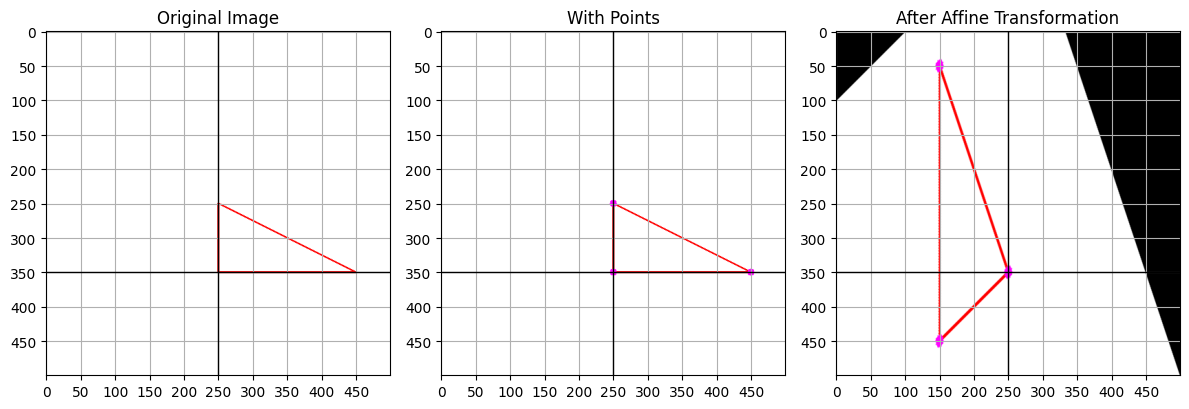

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show_with_matplotlib(ax, img, title):
    """Shows an image using matplotlib capabilities"""
    # Convert BGR image to RGB
    img_RGB = img[:, :, ::-1]
    # Show the image using matplotlib:
    ax.imshow(img_RGB)
    ax.set_title(title)
    ax.grid(True)
    ax.set_xticks(np.arange(0, 500, 50))
    ax.set_yticks(np.arange(0, 500, 50))
    ax.axhline(350, color='black', linewidth=1)  # 添加 x 轴线
    ax.axvline(250, color='black', linewidth=1)  # 添加 y 轴线

# 创建一个空白的白色图像
width, height = 500, 500
image = np.ones((height, width, 3), dtype=np.uint8)*255
offset_x = 250
offset_y = 350

# 定义红色三角形的顶点
red_triangle_pts = np.array([[0+offset_x, 0+offset_y], 
                             [200+offset_x, 0+offset_y], 
                             [0+offset_x, -100+offset_y]],
                            np.int32)
red_triangle_pts = red_triangle_pts.reshape((-1, 1, 2))

# 定义蓝色三角形的顶点
blue_triangle_pts = np.array([[0+offset_x, 0+offset_y], 
                              [-100+offset_x, -300+offset_y], 
                              [-100+offset_x, 100+offset_y]],
                             np.int32)
blue_triangle_pts = blue_triangle_pts.reshape((-1, 1, 2))

# 绘制红色三角形
cv2.polylines(image, [red_triangle_pts], isClosed=True, color=(0, 0, 255), thickness=2)
# 绘制蓝色三角形
#cv2.polylines(image, [blue_triangle_pts], isClosed=True, color=(255, 0, 0), thickness=2)

# 创建一份副本用于显示点
image_points = image.copy()
cv2.circle(image_points, (0+offset_x, 0+offset_y), 5, (255, 0, 255), -1)
cv2.circle(image_points, (200+offset_x, 0+offset_y), 5, (255, 0, 255), -1)
cv2.circle(image_points, (0+offset_x, -100+offset_y), 5, (255, 0, 255), -1)

# 定义仿射变换的源点和目标点
pts_1 = np.float32([[0+offset_x, 0+offset_y], 
                    [200+offset_x, 0+offset_y], 
                    [0+offset_x, -100+offset_y]])

pts_2 = np.float32([[0+offset_x, 0+offset_y], 
                    [-100+offset_x, -300+offset_y], 
                    [-100+offset_x, 100+offset_y]])

# 计算仿射变换矩阵并应用
M = cv2.getAffineTransform(pts_1, pts_2)
dst_image = cv2.warpAffine(image_points, M, (width, height))

# 创建三个子图并显示图像
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 显示原始图像、带点的图像、以及仿射变换后的图像
show_with_matplotlib(axes[0], image, 'Original Image')
show_with_matplotlib(axes[1], image_points, 'With Points')
show_with_matplotlib(axes[2], dst_image, 'After Affine Transformation')

plt.tight_layout()
plt.show()

# 作业2

### <font color=red> **作业：**</font><font color=blue>**由4组对应点计算透视变换矩阵**</font>

<br><center>![barcode](./images/barcode.png) ![barcode](./images/barcode-distorted.png)</center>
<br><center></center>

- 编程把右图的歪斜畸变校正过来
- 保存成如下文件：xxx 作业-透视变换.ipynb （xxx为姓名）
- 所有同学都需要提交上述文件，截止日期：本节课结束后2天内
- 下节课会抽查，被抽到的同学需要现场演示

## <font color=blue>**5 Perspective transformation of an image  图像的透视变换**</font>

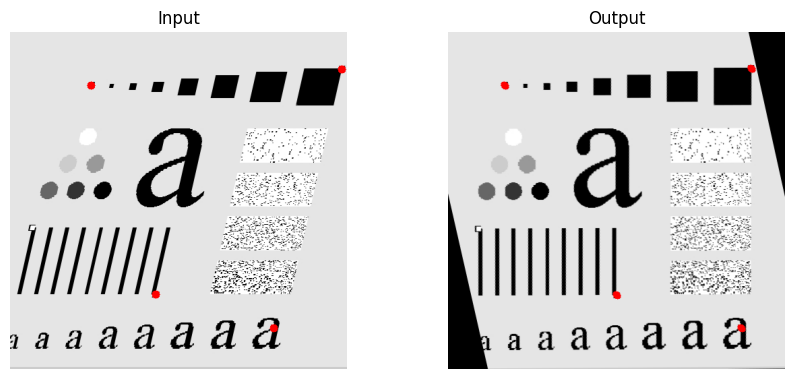

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_with_matplotlib(ax, img, title):
    """Shows an image using matplotlib capabilities on a given axis"""
    img_RGB = img[:, :, ::-1]  # Convert BGR to RGB
    ax.imshow(img_RGB)
    ax.set_title(title)
    ax.axis('off')  # Hide axis

# 读取输入图像
image = cv2.imread('./images/barcode-distorted.png')
assert image is not None, "file could not be read, check with os.path.exists()"

# 定义源图像和目标图像的四个点
pts1 = np.float32([[120, 79], [492, 55], [216, 389], [391, 439]])
pts2 = np.float32([[84, 79], [450, 54], [250, 390], [435, 439]])

# 在源图像上绘制选取的点
for p in pts1:
    cv2.circle(image, (int(p[0]), int(p[1])), 6, (0, 0, 255), -1)

# 计算透视变换矩阵并应用透视变换
M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(image, M, (500, 500))

# 创建子图用于横向排列图像
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 显示输入图像和变换后的图像
show_with_matplotlib(axes[0], image, 'Input')
show_with_matplotlib(axes[1], dst, 'Output')

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.3)

# 显示结果
plt.show()
